In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

configs = {
    "font.size": 20,
    "font.family": "Times New Roman",
}

rcParams.update(configs)

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
# load the resutls
model_name = 'ST_Transformer'
true_data = np.load(f'../test_results/{model_name}/y_data.npy')
predict_data = np.load(f'../test_results/{model_name}/predict_data.npy')
scalar = np.load(f'../test_results/{model_name}/scalar.npy')

temp_true = true_data.reshape(-1, 75)
temp_pred = predict_data.reshape(-1, 75)

# compute the mae, rmse, mape
mae = np.mean(np.abs(true_data - predict_data))
rmse = np.sqrt(np.mean(np.square(true_data - predict_data)))
mape = np.mean(np.abs((true_data - predict_data) / true_data))

print(f'MAE:{mae}\nRMSE:{rmse}\nMAPE:{mape}')


MAE:0.051422424614429474
RMSE:0.10669220238924026
MAPE:0.3338872492313385


In [5]:
true_data = true_data * scalar[1] + scalar[0]
predict_data = predict_data * scalar[1] + scalar[0]

print('true_data shape:', true_data.shape)
print('predict_data shape:', predict_data.shape)

true_data shape: (101, 6, 75)
predict_data shape: (101, 6, 75)


# Plot the 3D figure

In [6]:
# delte [10, 24], [11, 23], [6, 22], [7, 21]
edge_set = [[13, 14], [14, 15], [12, 13], [0, 12], [0, 16], [16, 17], [17, 18], [18, 19], [0, 1], [1, 20], [20, 2], [2, 3], [20, 8], [8, 9], [9, 10], [10, 11], [20, 4], [4, 5], [5, 6], [6, 7]]


true = -true_data[0, :].reshape(-1, 25, 3)[:, :21, :]
predict = -predict_data[0, :].reshape(-1, 25, 3)[:, :21, :]
print('true shape:', true.shape)
print('predict shape:', predict.shape)


true shape: (6, 21, 3)
predict shape: (6, 21, 3)


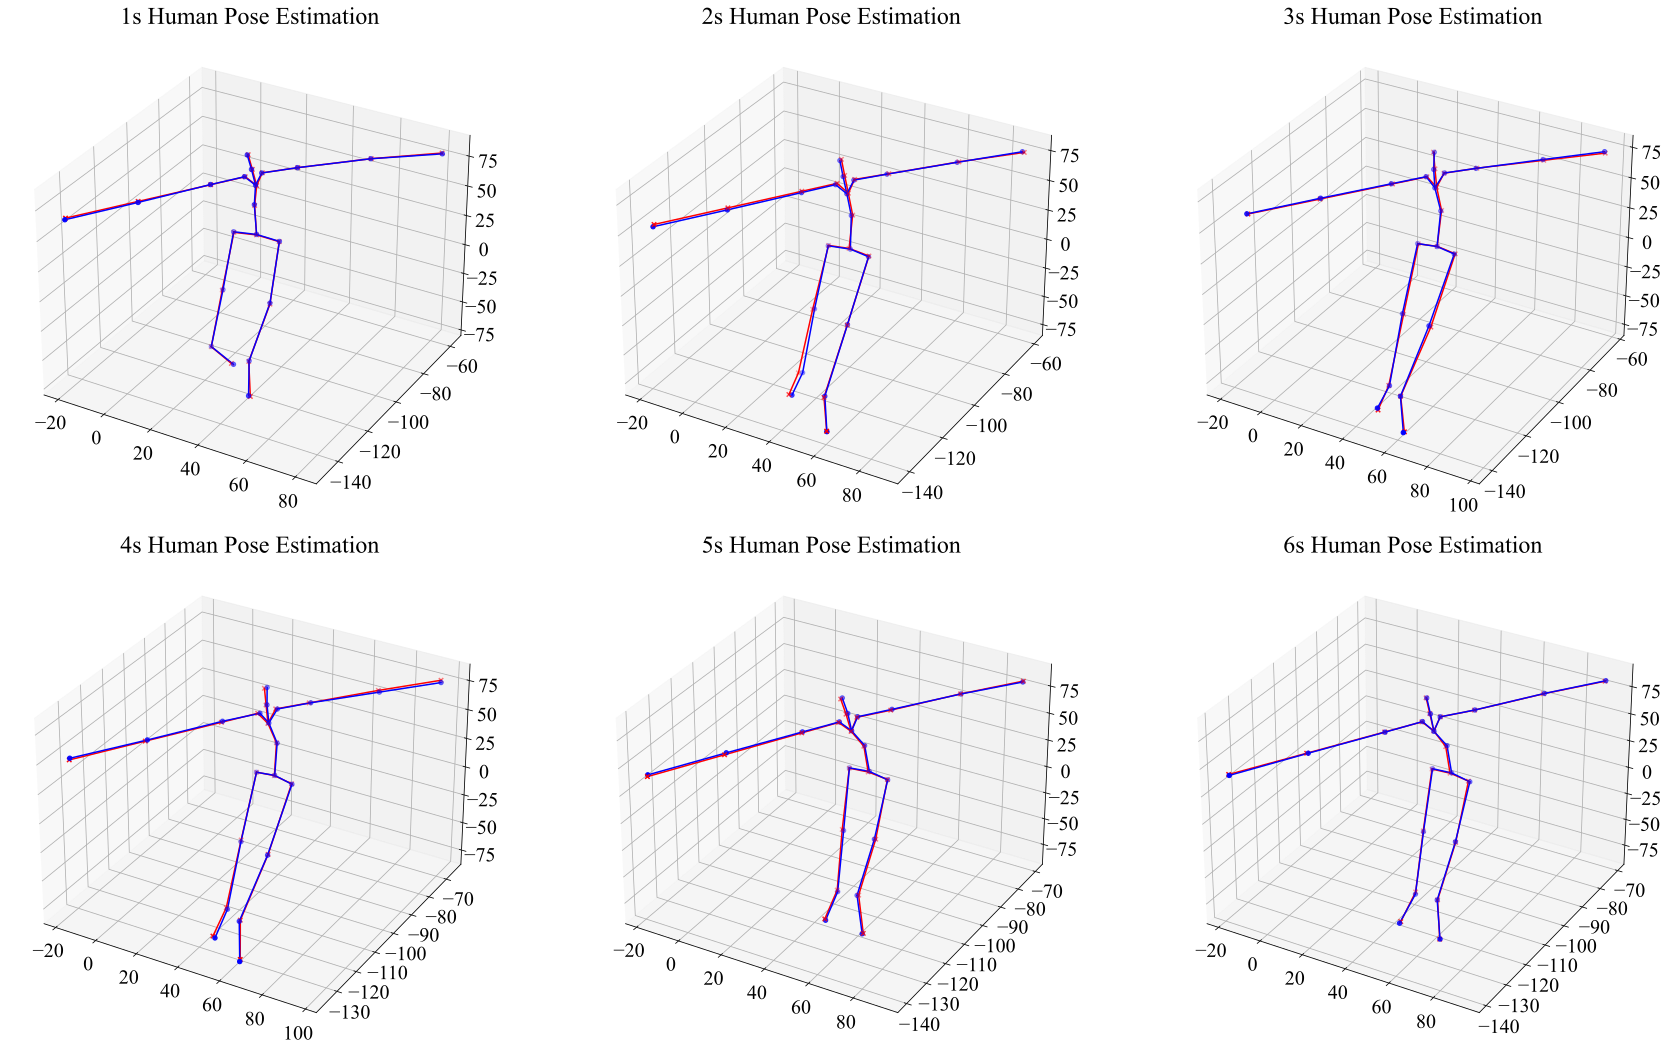

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# 创建3D绘图
fig = plt.figure(figsize=(25, 15))

for i in range(true.shape[0]):

    ax = fig.add_subplot(2, 3, (i+1), projection='3d')

    true_joints = true[i]

    # 绘制真实关节点
    ax.scatter(true_joints[:, 0], true_joints[:, 1], true_joints[:, 2], c='r', marker='x')

    # 绘制真实关节点的连线
    for connection in edge_set:
        true_x_coords = [true_joints[connection[0]][0], true_joints[connection[1]][0]]
        true_y_coords = [true_joints[connection[0]][1], true_joints[connection[1]][1]]
        true_z_coords = [true_joints[connection[0]][2], true_joints[connection[1]][2]]
        ax.plot(true_x_coords, true_y_coords, true_z_coords, c='r')

    # 绘制预测关节点
    predict_joints = predict[i]

    ax.scatter(predict_joints[:, 0], predict_joints[:, 1], predict_joints[:, 2], c='b', marker='o')

    # 绘制预测关节点的连线
    for connection in edge_set:
        predict_x_coords = [predict_joints[connection[0]][0], predict_joints[connection[1]][0]]
        predict_y_coords = [predict_joints[connection[0]][1], predict_joints[connection[1]][1]]
        predict_z_coords = [predict_joints[connection[0]][2], predict_joints[connection[1]][2]]
        ax.plot(predict_x_coords, predict_y_coords, predict_z_coords, c='b')

    # ax.set_xlabel('X')
    # ax.set_ylabel('Y')
    # ax.set_zlabel('Z')
    # ax.axis('off')
    ax.set_title(f'{i+1}s Human Pose Estimation')



# 显示图形
plt.tight_layout()
plt.show()

# choose the first sample and three feature

In [8]:
# # choose the first sample and three feature
# y = y_data[0, :]
# predict = predict_data[0, :]


# # plot the results
# fig, ax = plt.subplots(3, 1, figsize=(12, 15))
# ax[0].plot(y[:, 0], label='True', marker='o')
# ax[0].plot(predict[:, 0], label='Predict', marker='x')
# ax[0].legend()
# ax[0].set_xlabel('Time(s)')
# ax[0].set_ylabel('Normalized Value')

# ax[1].plot(y[:, 1], label='True', marker='o')
# ax[1].plot(predict[:, 1], label='Predict', marker='x')
# ax[1].legend()
# ax[1].set_xlabel('Time(s)')
# ax[1].set_ylabel('Normalized Value')

# ax[2].plot(y[:, 2], label='True', marker='o')
# ax[2].plot(predict[:, 2], label='Predict', marker='x')
# ax[2].legend()
# ax[2].set_xlabel('Time(s)')
# ax[2].set_ylabel('Normalized Value')


# plt.tight_layout()
# plt.show()